In [1]:
import torch
from torch import nn

## Net 1

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.Linear(500, 300),
            nn.Linear(300, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 300),
            nn.Linear(300, 500),
            nn.Linear(500, 784)
        )

    def forward(self, x):
        latent = self.encoder(x)
        output = self.decoder(latent)
        return output


In [3]:
input = torch.rand(784)
latent_dim = 2
autoencoder = AutoEncoder(latent_dim)

In [4]:
output = autoencoder(input)
output.shape

torch.Size([784])

## Net 2

In [5]:
from torchviz import make_dot
import ast

In [6]:
class Backward(nn.Module):
    def __init__(self):
        super(Backward, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [7]:
model = Backward()
input = torch.rand(1, 1)

output = model(input)

In [8]:
dict(model.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[-0.0105],
         [-0.9122],
         [-0.3506],
         [-0.1200],
         [-0.9887]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([-0.3520,  0.1018,  0.2953,  0.1596, -0.2839], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[ 0.0491,  0.2143, -0.0300,  0.3015, -0.3024]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([0.2337], requires_grad=True)}

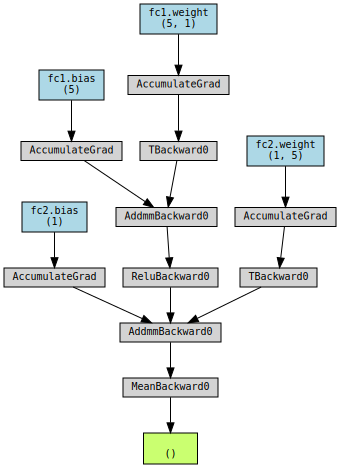

In [9]:
make_dot(output.mean(), params=dict(model.named_parameters()))

## Net 3

In [10]:
class CNN(nn.Module):
    def __init__(self, in_channels):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=1, groups=1)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), padding=0, dilation=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=1, groups=1)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), padding=0, dilation=1)
        self.flatten = nn.Flatten(0)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x


In [11]:
input = torch.rand(1, 32, 32)
model = CNN(1)

In [12]:
output = model(input)
output.shape

torch.Size([10])